<a href="https://colab.research.google.com/github/shwetakathait/practice_dataset/blob/main/water_potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.0 Call libraries

import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
#from sklearn.tree import export_graphviz

# 1.1.6
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1.1.7
from sklearn.datasets import make_classification

In [ ]:
df = pd.read_csv(r"C:\Users\verma\Downloads\water_potability.csv")
df

,sample,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,2,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,3,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,4,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,5,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...,...
3271,3272,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,3273,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,3274,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,3275,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
# 1.2 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df.isnull().sum()

sample               0
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.columns

Index(['sample', 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Potability'],
      dtype='object')

In [ ]:
df.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample           3276 non-null   int64  
 1   ph               2785 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          2495 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3114 non-null   float64
 9   Turbidity        3276 non-null   float64
 10  Potability       3276 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 281.7 KB


sample               0
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

3067    3
141     3
992     3
2065    3
929     3
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')
df.fillna(df.mean(), inplace=True)
df_imputed = imputer.fit_transform(df)

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [ ]:
df.isnull().sum()

sample             0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
# 4. Data Bifurcation [Training & Testing Datasets]
# -------------------------------------------------

# Dataset Used : df_ppd

train_df, test_df = train_test_split(df, test_size=0.25, random_state=1234)
train_df # Training Dataset
test_df # Testing Dataset

,sample,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1077,1078,8.037430,148.415309,48410.47101,4.755880,268.211896,392.901206,12.466610,66.396293,2.506238,1
1830,1831,5.404511,258.903489,10168.17654,9.648197,248.711963,396.911214,15.512208,65.805331,3.998176,0
361,362,7.063647,140.612866,17941.81126,6.275305,376.046156,402.593602,12.439740,29.468428,3.395866,1
1035,1036,8.310029,212.698276,40936.15339,7.703375,301.254422,365.431213,12.971869,70.485251,4.775785,0
2650,2651,8.000776,237.519250,18419.13288,8.323330,308.006321,396.376554,13.492536,82.753278,4.519210,0
...,...,...,...,...,...,...,...,...,...,...,...
664,665,7.080795,188.743562,19037.46264,6.034236,333.775777,388.065857,15.149068,78.499418,2.723651,1
3125,3126,6.103731,184.328693,17977.52565,7.275531,333.775777,334.949739,7.655381,59.000666,3.383049,1
1318,1319,6.724639,223.175416,41552.01966,7.744700,271.157120,463.885216,13.165035,61.058796,2.921415,0
723,724,10.137932,242.005716,15088.82765,8.677789,333.775777,596.346346,14.971199,62.365824,3.872018,1


,sample,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
576,577,6.124672,179.579753,27951.613070,8.075627,303.646928,467.171822,13.835117,69.017488,3.631007,0
1712,1713,5.853561,186.807751,19790.856930,6.615781,333.775777,489.796888,19.670703,65.040007,3.756874,0
1505,1506,7.080795,190.267367,15255.115260,7.597688,366.192327,418.476742,13.312723,68.944888,3.796737,1
118,119,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,66.396293,3.149158,0
2706,2707,7.873272,182.646659,25337.122960,3.715065,362.484604,315.189948,12.132425,65.499925,3.306393,0
...,...,...,...,...,...,...,...,...,...,...,...
1143,1144,6.143018,147.471973,34865.324630,3.684463,285.455102,475.445268,20.939359,54.198520,5.370403,1
3057,3058,7.985406,200.134697,17583.080330,6.771729,296.569823,377.584203,10.289288,66.890747,4.752452,0
2271,2272,8.388322,256.234007,16795.820480,4.143519,333.775777,333.946197,10.821321,55.190219,3.854772,0
1565,1566,6.191241,231.322797,29778.357880,4.381097,248.304391,488.954164,13.022135,54.060851,3.315071,1


In [ ]:
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation

In [ ]:
df_inputs = df[['ph', 'Hardness', 'Solids', 'Turbidity']]; df_inputs
df_output = df[['Potability']]; df_output

df_inputs_names = df_inputs.columns; df_inputs_names
df_output_labels = df_output['Potability'].unique().astype(str); df_output_labels

,ph,Hardness,Solids,Turbidity
0,7.080795,204.890456,20791.31898,2.963135
1,3.716080,129.422921,18630.05786,4.500656
2,8.099124,224.236259,19909.54173,3.055934
3,8.316766,214.373394,22018.41744,4.628771
4,9.092223,181.101509,17978.98634,4.075075
...,...,...,...,...
3271,4.668102,193.681736,47580.99160,4.435821
3272,7.808856,193.553212,17329.80216,2.798243
3273,9.419510,175.762646,33155.57822,3.298875
3274,5.126763,230.603758,11983.86938,4.708658


,Potability
0,0
1,0
2,0
3,0
4,0
...,...
3271,1
3272,1
3273,1
3274,1


Index(['ph', 'Hardness', 'Solids', 'Turbidity'], dtype='object')

array(['0', '1'], dtype='<U21')

In [ ]:
train_df_inputs, test_df_inputs, train_df_output, test_df_output = train_test_split(df_inputs, df_output, test_size=0.25, random_state=1234)

In [ ]:
df_dtc = DecisionTreeClassifier(criterion='gini', random_state=35019, max_depth = 3)
df_dtc_model = df_dtc.fit(df_inputs, df_output); df_dtc_model

DecisionTreeClassifier(max_depth=3, random_state=35019)

In [ ]:
# Decision Tree : Model Rules
dtc_model_rules = export_text(df_dtc_model, feature_names = list(df_inputs_names)); print(dtc_model_rules)

|--- ph <= 4.72
|   |--- Hardness <= 268.11
|   |   |--- Solids <= 10659.22
|   |   |   |--- class: 1
|   |   |--- Solids >  10659.22
|   |   |   |--- class: 0
|   |--- Hardness >  268.11
|   |   |--- class: 1
|--- ph >  4.72
|   |--- Hardness <= 162.07
|   |   |--- Hardness <= 98.41
|   |   |   |--- class: 1
|   |   |--- Hardness >  98.41
|   |   |   |--- class: 0
|   |--- Hardness >  162.07
|   |   |--- ph <= 8.27
|   |   |   |--- class: 0
|   |   |--- ph >  8.27
|   |   |   |--- class: 0



In [ ]:
# Decision Tree : Feature Importance
dtc_imp_features = pd.DataFrame({'Feature': df_inputs_names, 'Importance': np.round(df_dtc_model.feature_importances_, 3)})
dtc_imp_features.sort_values('Importance', ascending=False, inplace=True); dtc_imp_features

,Feature,Importance
1,Hardness,0.496
0,ph,0.429
2,Solids,0.075
3,Turbidity,0.000


In [ ]:
# Decision Tree : Model Prediction (Training Subset)
dtc_model_predict = df_dtc_model.predict(train_df_inputs); dtc_model_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# Decision Tree : Prediction (Testing Subset)
dtc_predict = df_dtc_model.predict(test_df_inputs); dtc_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat = pd.DataFrame(confusion_matrix(train_df_output, dtc_model_predict)); dtc_model_conf_mat
dtc_model_perf = classification_report(train_df_output, dtc_model_predict); print(dtc_model_perf)

,0,1
0,1513,2
1,926,16


              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1515
           1       0.89      0.02      0.03       942

    accuracy                           0.62      2457
   macro avg       0.75      0.51      0.40      2457
weighted avg       0.72      0.62      0.48      2457



In [ ]:
# Decision Tree : Prediction Evaluation (Testing Subset)
dtc_predict_conf_mat = pd.DataFrame(confusion_matrix(test_df_output, dtc_predict)); dtc_predict_conf_mat
dtc_predict_perf = classification_report(test_df_output, dtc_predict); print(dtc_predict_perf)

,0,1
0,481,2
1,330,6


              precision    recall  f1-score   support

           0       0.59      1.00      0.74       483
           1       0.75      0.02      0.03       336

    accuracy                           0.59       819
   macro avg       0.67      0.51      0.39       819
weighted avg       0.66      0.59      0.45       819



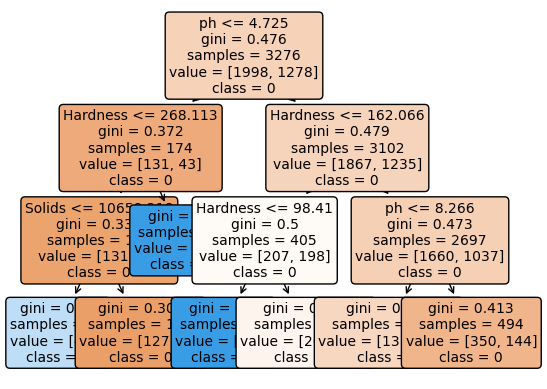

In [ ]:
# Decision Tree : Plot [Training Subset]
train_subset_dtc_plot = plot_tree(df_dtc_model, feature_names=df_inputs_names, class_names=df_output_labels, rounded=True, filled=True, fontsize=10)
plt.show()

<AxesSubplot:>

Text(0.5, 23.52222222222222, 'Predicted Label')

Text(50.722222222222214, 0.5, 'True Label')

Text(0.5, 1.0, 'Decision Tree : Confusion Matrix')

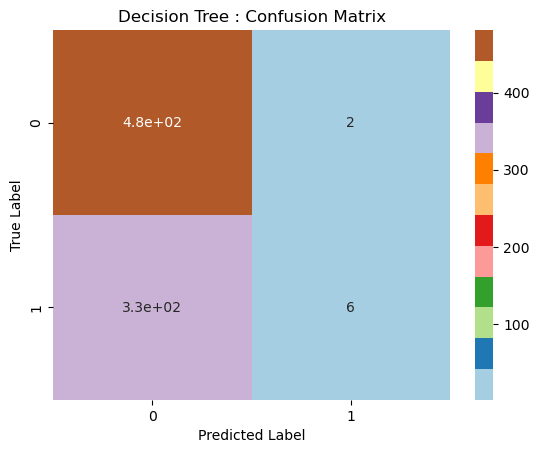

In [ ]:
# Confusion Matrix : Plot [Testing Subset]
ax = plt.axes()
sns.heatmap(dtc_predict_conf_mat, annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')
plt.show()


Random Forest

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from pathlib import Path
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
pathToFolder= (r"C:\Users\verma\Downloads")

In [ ]:
path = Path(pathToFolder) / "water_potability.csv"

In [ ]:
df = pd.read_csv(path, true_values = ['yes'], false_values = ['no'])

In [ ]:
df.shape
df.head()

(3276, 11)

,sample,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,2,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,3,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,4,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,5,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
imputer = SimpleImputer(strategy='mean')
df.fillna(df.mean(), inplace=True)
df_imputed = imputer.fit_transform(df)

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [ ]:
df.isnull().sum()

sample             0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
# 1.3 Get target
y = df.Potability

In [ ]:
# 1.4 Select predictors
X = df.drop(['Potability'], axis=1)

In [ ]:
my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=100))

In [ ]:
cv_scores = cross_val_score(my_pipeline, X, y,
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.620879


# Objectives

To build a model that takes in the various attributes of a water sample and predicts whether the water is potable or not.

To evaluate the performance of both decision trees and random forests in classifying water potability accurately.

To measure metrics such as accuracy and F1-score to determine how well the models are distinguishing between potable and non-potable water samples.

To determine the importance of different features (ph, hardness, solids, turbidity) in predicting water potability.

# Findings

According to feature importance, 'Hardness' is the most important variable, then ph, solids and turbidity respectively.

The decision tree prediction evaluation accuracy is 59%.

The Cross-validation accuracy has come out to be around 0.6208, which suggests that the model is correctly predicting the target variable (or class labels) for approximately 62% of the data in the cross-validation process.

Hence, out of the two models Random Forest shows more accuracy in predicting the potability of the water.

# Interpretation and Analysis of Decision Tree

## Interpretation

The root node splits the data based on the pH value. If the pH is less than or equal to 4.72, the left branch is taken. If the pH is greater than 4.72, the right branch is taken.

If pH <= 4.72 and Hardness <= 268.11, the algorithm further checks the Solids value.

If Solids <= 10659.22, the prediction is class 1 (potable water).
If Solids > 10659.22, the prediction is class 0 (non-potable water).
If pH <= 4.72 and Hardness > 268.11, the prediction is class 1 (potable water).

If pH > 4.72 and Hardness <= 162.07, the algorithm further checks the Hardness value.

If Hardness <= 98.41, the prediction is class 1 (potable water).
If Hardness > 98.41, the prediction is class 0 (non-potable water).
If pH > 4.72 and Hardness > 162.07, the algorithm further checks the pH value.

If pH <= 8.27, the prediction is class 0 (non-potable water).
If pH > 8.27, the prediction is class 0 (non-potable water).


## Analysis
The tree structure suggests that pH and Hardness are significant factors in determining water potability. These features are used multiple times as splitting criteria.

Solids and pH are also important features but are not as prominently used for splitting, indicating their secondary significance.

The tree seems to be leaning towards predicting non-potable water (class 0) more frequently, especially in cases where pH is higher and/or Hardness is greater than a certain threshold.

It's clear that pH values below 4.72 are strong indicators of potable water.